In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms

In [3]:
import torchvision
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
images, labels = next(iter(train_loader))
print(train_dataset.__len__())

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.8MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 482kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.68MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

60000


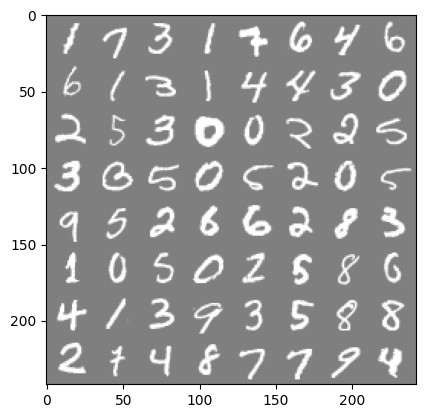

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

imshow(torchvision.utils.make_grid(images))

In [5]:
class CNN_Net(nn.Module):
    def __init__(self, num_classes):
      super(CNN_Net, self).__init__()
      self.CNN1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=5, stride=1, padding=1)
      self.CNN2 = nn.MaxPool2d(kernel_size=2, stride=2)
      self.CNN3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, stride=1, padding=1)
      self.CNN4 = nn.MaxPool2d(kernel_size=2, stride=2)
      self.fc1 = nn.Linear(64*5*5, 128)
      self.fc2 = nn.Linear(128, 128)
      self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
      x1 = nn.ReLU()(self.CNN1(x))
      x2 = nn.ReLU()(self.CNN2(x1))
      x3 = nn.ReLU()(self.CNN3(x2))
      x4 = nn.ReLU()(self.CNN4(x3))
      x5 = x4.view(-1, 64*5*5)
      x6 = nn.ReLU()(self.fc1(x5))
      x7 = nn.Dropout(0.25)(x6)
      x8 = nn.ReLU()(self.fc2(x7))
      x9 = nn.Dropout(0.25)(x8)
      x10 = nn.LogSoftmax(dim=1)(self.fc3(x9))

      return x10

In [6]:
my_CNN = CNN_Net(10)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_CNN.parameters(), lr=0.001)

In [ ]:
loss_track = []
for i in range(10):
  for images, labels in train_loader:
    images = images.view(-1, 1, 28, 28)
    optimizer.zero_grad()
    outputs = my_CNN(images)
    loss_value = loss(outputs, labels)
    loss_value.backward()
    optimizer.step()
  loss_track.append(loss_value)
  print('epoch: ', i, 'loss: ', loss_value.item())

epoch:  0 loss:  0.19219782948493958
epoch:  1 loss:  0.035709481686353683
epoch:  2 loss:  0.0371309332549572


In [ ]:
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=True)
correct = 0.0
total = 0.0
with torch.no_grad():
  for images, labels in test_loader:
    images = images.view(-1, 1, 28, 28)
    outputs = my_CNN(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %f %%' % (100 * correct / total))

In [ ]:
loss_track_numpy = []
for i in loss_track:
  loss_track_numpy.append(i.item())
plt.plot(loss_track_numpy[0:500])
plt.show()

In [ ]:
# ()- Represents pool size
# Learning rate  SoftMax Epochs   Kernel size   Batch size   CNN sizes       MLP Sizes            Droupout    Accuracy
# 0.001          0       10       3              64           32,(2),32,(2)  32*7*7,128,10        0           99
# 0.0001         0       10       3              64           32,(2),32,(2)  32*7*7,128,10        0           98
# 0.0001         0       10       3              64           32,(2),32,(2)  32*7*7,128,10        0.5         97
# 0.001          0       10       3              64           32,(2),32,(2)  32*7*7,128,10        0.5         98
# 0.001          0       10       3              64           32,(2),32,(2)  32*7*7,128,64,10     0.5,0       98.43
# 0.001          0       10       3              64           32,(2),32,(2)  32*7*7,128,64,10     0.5,0.5     98.04
# 0.001          0       10       3              64           32,(2),32,(2)  32*7*7,128,128,10    0.5,0.5     98.21
# 0.001          log     10       3              64           32,(2),32,(2)  32*7*7,128,64,10     0.5,0.5     98.35
# 0.001          log     10       5              64           32,(2),32,(2)  32*5*5,128,64,10     0.5,0.5     98.76
# 0.001          log     10       5              64           32,(2),32,(2)  32*5*5,128,64,10     0.5,0.25    98.90
# 0.001          log     10       5              64           32,(2),32,(2)  32*5*5,128,128,10    0.5,0.25    98.95
# 0.001          log     10       5              64           32,(2),32,(2)  32*5*5,128,128,10    0.25,0.5    98.84
# 0.001          log     10       5              64           32,(2),32,(2)  32*5*5,128,128,10    0.25,0.25   98.86
# 0.001          log     10       5              64           32,(2),64,(2)  64*5*5,128,64,10     0.25,0.25   98.99
# 0.001          log     10       5              64           64,(2),64,(2)  64*5*5,128,64,10     0.25,0.25   99.03
# 0.001          log     10       5              64           64,(2),64,(2)  64*5*5,128,64,10     0.5,0.25    98.77
# 0.001          log     10       5              64           64,(2),64,(2)  64*5*5,128,128,10    0.25,0.25   99.16